In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

%matplotlib inline
import statsmodels.api as sm

In [101]:
#Helper method to properly parse the values in each column
def make_float(text):
    return float(text.replace('-', '0').replace('.', '').replace(',', '.').strip('" '))

In [102]:
data = pd.read_csv("LAEI2013_MajorRoads_EmissionsbyLink_2013_LTS_Rds.csv", sep=';', decimal=",",
                    converters={
                        'Artic6Axle' : make_float,
                        'Coach' : make_float,
                        'LtBus' : make_float,
                        'DieselLgv' : make_float,
                        'PetrolLgv' : make_float,
                        'DieselCar' : make_float,
                        'PetrolCar' : make_float,
                        'Artic5Axle' : make_float,
                        'Artic3Axle' : make_float,
                        'Rigid4Axle' : make_float,
                        'Rigid3Axle' : make_float,
                        'Rigid2Axle' : make_float,
                        'Artic' : make_float,
                        'Rigid' : make_float,
                        'BusAndCoach' : make_float,
                        'Car' : make_float,
                        'Lgv' : make_float,
                        'Taxi' : make_float,
                        'Motorcycle' : make_float,
                        'ElectricCar' : make_float,
                        'ElectricLgv' : make_float,
                    })
print(data.shape)
data.head()

(366220, 32)


,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,Lts,Length (m),Emissions,Year,Pollutant,...,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach,ElectricCar,ElectricLgv
0,6253,4000000027908919,24,External,NonGLA,18898,50.8,DFT,2013,CO2,...,0.241,0.191,8.761,4.811,0.038,1.735,0.0,0.0,0.0,0.0
1,6253,4000000027947931,24,External,NonGLA,18895,28.6,DFT,2013,CO2,...,0.000,0.000,0.016,0.009,0.000,0.000,0.0,0.0,0.0,0.0
2,6253,4000000028013383,24,External,NonGLA,15816,5.1,DFT,2013,CO2,...,0.027,0.022,0.939,0.519,0.004,0.184,0.0,0.0,0.0,0.0
3,6253,4000000028025820,24,External,NonGLA,15816,3.8,DFT,2013,CO2,...,0.020,0.016,0.692,0.382,0.003,0.136,0.0,0.0,0.0,0.0
4,6253,4000000028029388,24,External,NonGLA,15816,1.6,DFT,2013,CO2,...,0.009,0.007,0.299,0.165,0.001,0.059,0.0,0.0,0.0,0.0


In [103]:
data.describe(include='all')

,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,Lts,Length (m),Emissions,Year,Pollutant,...,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach,ElectricCar,ElectricLgv
count,366220.000000,3.662200e+05,366220.000000,366220,366220,366220.000000,366220.000000,366220,366220.0,366220,...,366220.000000,366220.000000,366220.000000,366220.000000,366220.000000,366220.000000,366220.000000,366220.000000,366220.0,366220.0
unique,NaN,NaN,NaN,4,34,NaN,NaN,2,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Outer,NonGLA,NaN,NaN,COPERT,NaN,CO2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,195620,65380,NaN,NaN,329598,NaN,36622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10015.480667,4.000000e+15,1820.920075,NaN,NaN,9983.574682,64.030886,NaN,2013.0,NaN,...,0.068965,0.041184,1.654557,0.889033,0.007509,0.341668,0.383019,0.096490,0.0,0.0
std,1790.892387,4.205791e+05,942.371458,NaN,NaN,5076.029862,82.558449,NaN,0.0,NaN,...,0.503252,0.312234,10.401979,5.504355,0.047372,2.147972,3.087232,1.779888,0.0,0.0
min,5918.000000,4.000000e+15,7.000000,NaN,NaN,18.000000,0.000000,NaN,2013.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,8676.000000,4.000000e+15,1007.000000,NaN,NaN,5786.000000,12.800000,NaN,2013.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,9871.000000,4.000000e+15,1814.000000,NaN,NaN,10494.000000,38.800000,NaN,2013.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,11277.000000,4.000000e+15,2688.000000,NaN,NaN,14256.000000,82.900000,NaN,2013.0,NaN,...,0.000000,0.000000,0.002000,0.002000,0.000000,0.001000,0.000000,0.000000,0.0,0.0


In [104]:
#Check if there are any empty/missing values
data.isnull().sum().sort_values(ascending=True)

GridId                  0
Coach                   0
LtBus                   0
DieselLgv               0
PetrolLgv               0
DieselCar               0
PetrolCar               0
Artic6Axle              0
Artic5Axle              0
Artic3Axle              0
Rigid4Axle              0
Rigid3Axle              0
Rigid2Axle              0
Artic                   0
Rigid                   0
Lgv                     0
BusAndCoach             0
Car                     0
Taxi                    0
Motorcycle              0
Emissions Unit          0
Pollutant               0
Year                    0
Emissions               0
Length (m)              0
Lts                     0
BoroughName_ExactCut    0
Location_ExactCut       0
GRID_ExactCut_ID        0
Toid                    0
ElectricCar             0
ElectricLgv             0
dtype: int64

In [105]:
#Remove irrelevant columns
del data['GridId']
del data['Location_ExactCut']
del data['Emissions Unit']
del data['Toid']
del data['Year']
del data['GRID_ExactCut_ID']
del data['Lts']
del data['Emissions']
del data['ElectricCar']
del data['ElectricLgv']
data.head()

,BoroughName_ExactCut,Length (m),Pollutant,Motorcycle,Taxi,Car,BusAndCoach,Lgv,Rigid,Artic,...,Rigid4Axle,Artic3Axle,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach
0,NonGLA,50.8,CO2,0.158,0.375,13.572,0.0,1.773,1.539,0.609,...,0.315,0.177,0.241,0.191,8.761,4.811,0.038,1.735,0.0,0.0
1,NonGLA,28.6,CO2,0.000,0.000,0.024,0.0,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.016,0.009,0.000,0.000,0.0,0.0
2,NonGLA,5.1,CO2,0.017,0.040,1.458,0.0,0.188,0.169,0.069,...,0.035,0.020,0.027,0.022,0.939,0.519,0.004,0.184,0.0,0.0
3,NonGLA,3.8,CO2,0.013,0.029,1.074,0.0,0.139,0.125,0.051,...,0.026,0.015,0.020,0.016,0.692,0.382,0.003,0.136,0.0,0.0
4,NonGLA,1.6,CO2,0.005,0.013,0.464,0.0,0.060,0.054,0.022,...,0.011,0.006,0.009,0.007,0.299,0.165,0.001,0.059,0.0,0.0


### Computing note

- Motocycle = motocycle
- Taxi = Taxi
- Car = PetrolCar + DieselCar + ElectricCar
- BusAndCoach = LtBus + Coach
- Lgv = PetrolLgv + DieselLgv + ElectricLgv
- Rigid = Ridid2Axle + Rigid3Axle + Rigid4Axle
- Artic = Artic3Axle + Artic5Axle + Artic6Axle


We can safely drop sub-computed columns

In [106]:
#Heavy Goods Vehicle
data['Hgv'] = data['Artic']+data['Rigid']
#Create a column with the sum of all emissions
data['TotalEmissions'] = data['Motorcycle']+data['Taxi']+data['Car']+data['BusAndCoach']+data['Lgv']+data['Hgv']
del data['Artic']
del data['Rigid']
del data['Artic3Axle']
del data['Artic5Axle']
del data['Artic6Axle']
del data['Rigid2Axle']
del data['Rigid3Axle']
del data['Rigid4Axle']
del data['PetrolCar']
del data['PetrolLgv']
del data['DieselCar']
del data['DieselLgv']
del data['LtBus']
del data['Coach']

data.head()

,BoroughName_ExactCut,Length (m),Pollutant,Motorcycle,Taxi,Car,BusAndCoach,Lgv,Hgv,TotalEmissions
0,NonGLA,50.8,CO2,0.158,0.375,13.572,0.0,1.773,2.148,18.026
1,NonGLA,28.6,CO2,0.000,0.000,0.024,0.0,0.000,0.000,0.024
2,NonGLA,5.1,CO2,0.017,0.040,1.458,0.0,0.188,0.238,1.941
3,NonGLA,3.8,CO2,0.013,0.029,1.074,0.0,0.139,0.176,1.431
4,NonGLA,1.6,CO2,0.005,0.013,0.464,0.0,0.060,0.076,0.618


<AxesSubplot:>

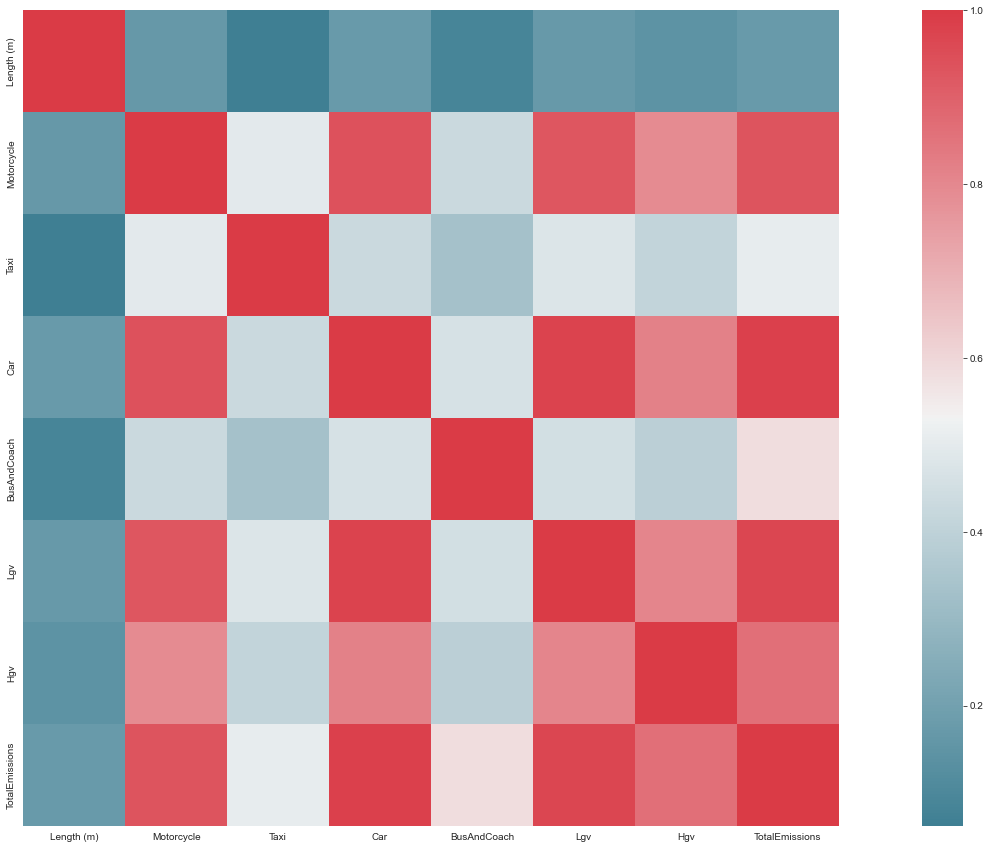

In [107]:
#Correlation Matrix shows correlation between the total emissions and the type of vehicle
f, ax = pl.subplots(figsize=(30, 15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)


In [108]:
#Following columns are no longer needed
del data['Motorcycle']
del data['Taxi']
del data['Car']
del data['BusAndCoach']
del data['Lgv']
del data['Hgv']
data.head()

,BoroughName_ExactCut,Length (m),Pollutant,TotalEmissions
0,NonGLA,50.8,CO2,18.026
1,NonGLA,28.6,CO2,0.024
2,NonGLA,5.1,CO2,1.941
3,NonGLA,3.8,CO2,1.431
4,NonGLA,1.6,CO2,0.618


In [109]:
#Aggregate data by borough and pollutant
grouped_by = data.groupby(['BoroughName_ExactCut', 'Pollutant'])['TotalEmissions'].agg('sum')
grouped_by.unstack()

Pollutant,CO2,NOx,PM10_Brake,PM10_Exhaust,PM10_Resusp,PM10_Tyre,PM25_Brake,PM25_Exhaust,PM25_Resusp,PM25_Tyre
BoroughName_ExactCut,,,,,,,,,,
Barking and Dagenham,17863.894,69.021,4.107,0.873,3.139,0.662,1.539,0.822,0.027,0.432
Barnet,51820.786,188.588,11.935,2.325,7.661,1.981,4.465,2.165,0.059,1.285
Bexley,28277.950,104.125,6.522,1.385,4.478,1.099,2.439,1.279,0.025,0.715
Brent,49577.515,176.248,10.758,2.295,7.945,1.761,3.966,2.166,0.090,1.118
Bromley,56506.094,191.871,13.685,2.851,8.019,2.474,5.122,2.668,0.063,1.639
Camden,50839.221,174.764,10.074,2.788,6.496,1.686,3.732,2.636,0.059,1.077
City,12310.429,63.583,1.657,0.739,1.974,0.170,0.564,0.693,0.029,0.084
City of Westminster,59037.680,205.892,10.979,3.881,6.384,1.724,4.000,3.644,0.045,1.072
Croydon,58511.355,205.861,13.271,2.865,8.773,2.293,5.033,2.705,0.097,1.527


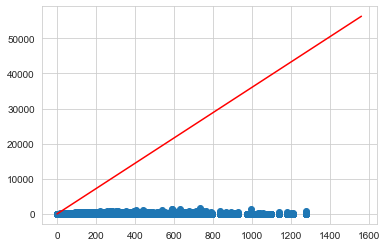

In [110]:
# plotting the original values
x = data["Length (m)"]
y = data["TotalEmissions"]
pl.scatter(x, y)

max_x = data["TotalEmissions"].max()
min_x = data["TotalEmissions"].min()

# range of values for plotting
# the regression line
x = np.arange(min_x, max_x, 1)

# the substituted equation
y =  36.0594 * x + 0.0513

# plotting the regression line
pl.plot(y, 'r')
pl.show()

In [111]:
#Convert Categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Pollutant', 'BoroughName_ExactCut'], drop_first=True)
data.head()

,Length (m),TotalEmissions,Pollutant_NOx,Pollutant_PM10_Brake,Pollutant_PM10_Exhaust,Pollutant_PM10_Resusp,Pollutant_PM10_Tyre,Pollutant_PM25_Brake,Pollutant_PM25_Exhaust,Pollutant_PM25_Resusp,...,BoroughName_ExactCut_Merton,BoroughName_ExactCut_Newham,BoroughName_ExactCut_NonGLA,BoroughName_ExactCut_Redbridge,BoroughName_ExactCut_Richmond,BoroughName_ExactCut_Southwark,BoroughName_ExactCut_Sutton,BoroughName_ExactCut_Tower Hamlets,BoroughName_ExactCut_Waltham Forest,BoroughName_ExactCut_Wandsworth
0,50.8,18.026,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,28.6,0.024,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5.1,1.941,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3.8,1.431,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.6,0.618,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [112]:
#Features
X = data.loc[:, data.columns != 'TotalEmissions']
#target
y = data["TotalEmissions"]

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting OLS model
model = sm.OLS(y,X_1).fit()

#How to interpret the summary: https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         TotalEmissions   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     3359.
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:59:15   Log-Likelihood:            -1.6247e+06
No. Observations:              366220   AIC:                         3.250e+06
Df Residuals:                  366176   BIC:                         3.250e+06
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------